# Sentiment Analysis Project


## Load the Data

In [66]:
import pandas as pd
import numpy as np

df = pd.read_csv("moviereviews.tsv" , sep="\t")

In [67]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


## Remove Blank Records (optional)

In [68]:
df["label"].isnull().sum()

0

In [69]:
df["review"].isnull().sum()


35

In [70]:
#see the records which are null
df[df["review"].isnull()]

,label,review
140,pos,NaN
208,pos,NaN
270,neg,NaN
334,neg,NaN
448,neg,NaN
522,neg,NaN
606,pos,NaN
696,neg,NaN
728,pos,NaN
738,neg,NaN


In [71]:
#Drop the null records

df=df.dropna().reset_index(drop=True)

In [72]:
#check if still null records are there
df["review"].isnull().sum()


0

In [84]:
df['label'].value_counts()

label
neg    983
pos    982
Name: count, dtype: int64

## Import `SentimentIntensityAnalyzer` and create an sid object
This assumes that the VADER lexicon has been downloaded.

In [73]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yraja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [74]:
sid  = SentimentIntensityAnalyzer()
#check the polarity of the first review

sid.polarity_scores(df["review"][1]) #positive, negative, neutral and compound score

{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'compound': -0.8618}

In [75]:
sid.polarity_scores(df["review"][0]) #positive, negative, neutral and compound score

{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'compound': -0.9125}

In [76]:
print(x["compound"])
#check the polarity of the first review

0.9954


## Use sid to append a `comp_score` to the dataset

In [77]:
len(df)

1965

In [82]:
for i in range(len(df)):
    x = sid.polarity_scores(df["review"][i])
    df.loc[i, "positive"] = x["pos"]
    df.loc[i, "negative"] = x["neg"]
    df.loc[i, "neutral"] = x["neu"]
    df.loc[i, "compound"] = x["compound"]


In [83]:
print(df.head())

  label                                             review  positive  \
0   neg  how do films like mouse hunt get into theatres...     0.101   
1   neg  some talented actresses are blessed with a dem...     0.105   
2   pos  this has been an extraordinary year for austra...     0.150   
3   pos  according to hollywood movies made in last few...     0.147   
4   neg  my first press screening of 1998 and already i...     0.093   

   negative  neutral  compound  
0     0.121    0.778   -0.9125  
1     0.120    0.775   -0.8618  
2     0.068    0.781    0.9951  
3     0.071    0.782    0.9972  
4     0.091    0.817   -0.2484  


## Perform a comparison analysis between the original `label` and `comp_score`

In [85]:
df['comp_review'] = df['compound'].apply(lambda x: 'pos' if x >= 0 else 'neg')

In [86]:
df.head()

,label,review,positive,negative,neutral,compound,comp_review
0,neg,how do films like mouse hunt get into theatres...,0.101,0.121,0.778,-0.9125,neg
1,neg,some talented actresses are blessed with a dem...,0.105,0.120,0.775,-0.8618,neg
2,pos,this has been an extraordinary year for austra...,0.150,0.068,0.781,0.9951,pos
3,pos,according to hollywood movies made in last few...,0.147,0.071,0.782,0.9972,pos
4,neg,my first press screening of 1998 and already i...,0.093,0.091,0.817,-0.2484,neg


In [89]:
# Checking accuracy of the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_score(df["label"], df["comp_review"])



0.6335877862595419

In [90]:
print(classification_report(df["label"], df["comp_review"]))    


              precision    recall  f1-score   support

         neg       0.72      0.43      0.54       983
         pos       0.60      0.83      0.69       982

    accuracy                           0.63      1965
   macro avg       0.66      0.63      0.62      1965
weighted avg       0.66      0.63      0.62      1965



In [91]:
print(confusion_matrix(df["label"], df["comp_review"]))

[[427 556]
 [164 818]]


In [94]:
!pip install matplotlib
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


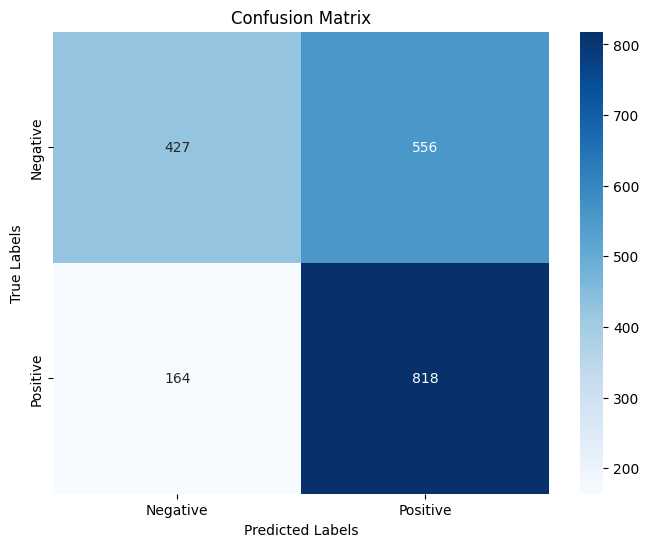

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(df["label"], df["comp_review"])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

